In [ ]:
from google.colab import drive
drive.mount('/content/data')

Mounted at /content/data


In [ ]:
import tensorflow as tf
import os
import numpy as np
import cv2


In [ ]:
data_dir = '/content/data/MyDrive/dataset_isl'

In [ ]:
from keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing.image import img_to_array

from sklearn.model_selection import train_test_split
from keras.preprocessing import image
from matplotlib import pyplot as plt


In [ ]:
import pandas as pd

def load_images_to_dataframe(directory):
    data = []
    for root, _, files in os.walk(directory):
        for file in files:
            if file.endswith(".jpg") or file.endswith(".png"):  # Filter for image files
                image_path = os.path.join(root, file)
                label = os.path.basename(root)  # Extract label from directory name
                image = cv2.imread(image_path)
                # Additional preprocessing or feature extraction can be performed here
                data.append({"image_path": image_path, "label": label})
    return pd.DataFrame(data)

In [ ]:
df = load_images_to_dataframe(data_dir)
print(df.tail())


                                              image_path label
13547  /content/data/MyDrive/dataset_isl/Q/captured_r...     Q
13548  /content/data/MyDrive/dataset_isl/Q/captured_r...     Q
13549  /content/data/MyDrive/dataset_isl/Q/captured_r...     Q
13550  /content/data/MyDrive/dataset_isl/Q/captured_r...     Q
13551  /content/data/MyDrive/dataset_isl/Q/captured_r...     Q


In [ ]:
print(df.head())

                                          image_path label
0  /content/data/MyDrive/dataset_isl/A/captured_r...     A
1  /content/data/MyDrive/dataset_isl/A/captured_r...     A
2  /content/data/MyDrive/dataset_isl/A/captured_r...     A
3  /content/data/MyDrive/dataset_isl/A/captured_r...     A
4  /content/data/MyDrive/dataset_isl/A/captured_r...     A


In [ ]:
#splitting the dataframe
X_Train,X_Test = train_test_split(df,train_size=0.9,random_state=123,shuffle=True)

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                        zoom_range=0.2,
                                        shear_range=0.2,
                                        brightness_range=[0.6,1.0],
                                        rotation_range=35,
                                        width_shift_range=0.1,
                                        height_shift_range=0.1,
                                        vertical_flip=True,
                                         featurewise_std_normalization=False,
                                         samplewise_center=False,
                                         samplewise_std_normalization=False,
                                        fill_mode="nearest",
                                        validation_split=0.1)

test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
def simple_vision(img_path):
    Picking_Img = cv2.cvtColor(cv2.imread(img_path),cv2.COLOR_BGR2RGB)

    return Picking_Img

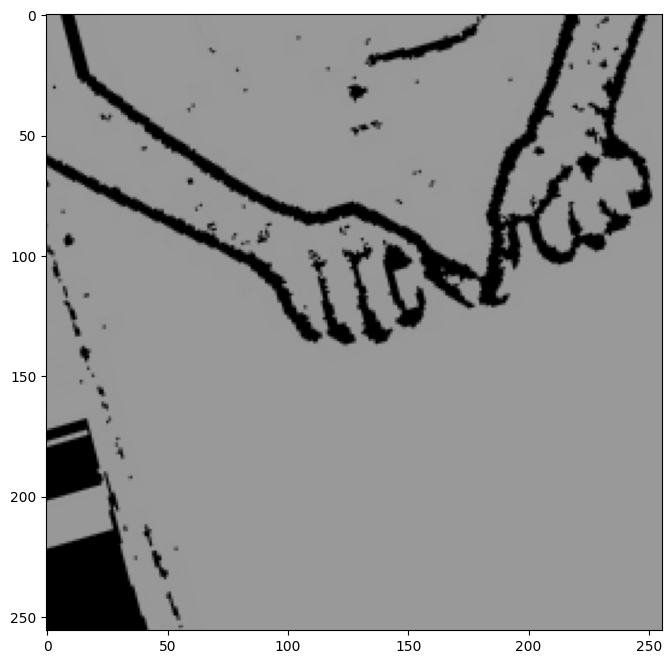

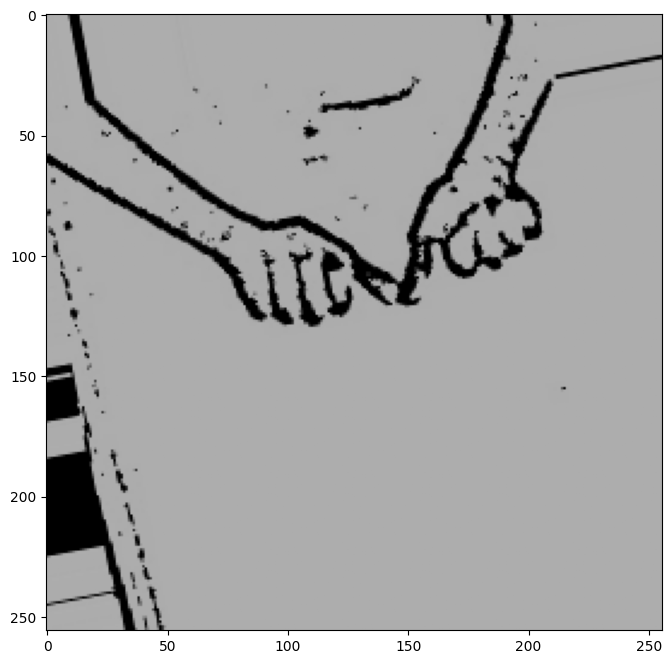

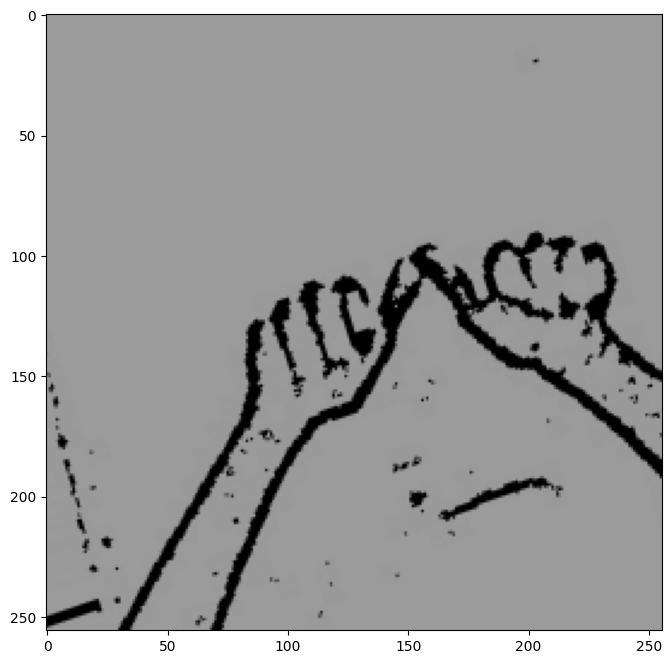

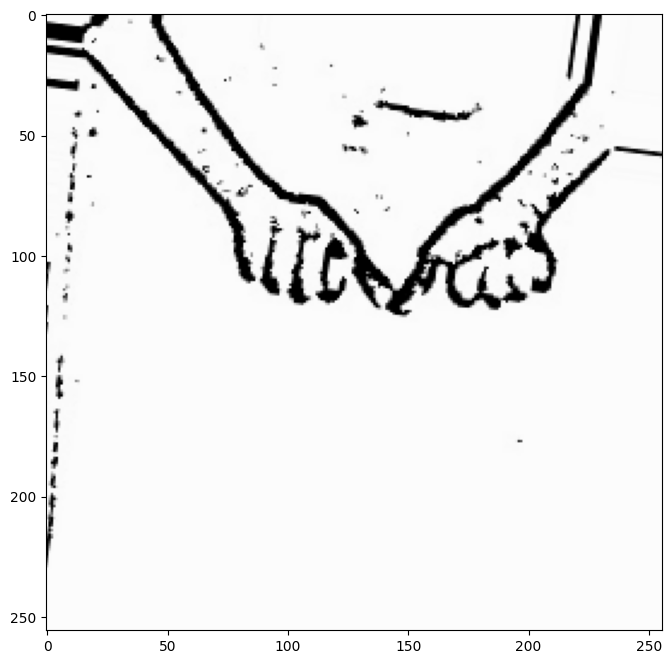

In [ ]:
Example_Img = simple_vision(X_Train.image_path[3])
Example_Img = Example_Img.reshape((1,) + Example_Img.shape)

i = 0

for batch in train_datagen.flow(Example_Img,batch_size=32):

    figure = plt.figure(figsize=(8,8))
    plt.imshow(image.img_to_array(batch[0]))

    i += 1
    if i % 4 == 0:
        break

plt.show()

In [ ]:
Train_Set = train_datagen.flow_from_dataframe(dataframe=X_Train,
                                                   batch_size=32,
                                                    x_col='image_path',
                                                    y_col='label',
                                                   class_mode="categorical",
                                                   color_mode="grayscale",
                                                   subset="training"
                                                   )

Found 10977 validated image filenames belonging to 26 classes.


In [ ]:
Validation_Set = train_datagen.flow_from_dataframe(dataframe=X_Train,
                                                   batch_size=32,
                                                    x_col='image_path',
                                                    y_col='label',
                                                   class_mode="categorical",
                                                   color_mode="grayscale",
                                                   subset="validation"
                                                   )

Found 1219 validated image filenames belonging to 26 classes.


In [ ]:
Test_Set = test_datagen.flow_from_dataframe(dataframe=X_Test,
                                                   batch_size=32,
                                                    x_col='image_path',
                                                    y_col='label',
                                                   class_mode="categorical",
                                                   color_mode="grayscale",
                                                   shuffle=False
                                                 )

Found 1356 validated image filenames belonging to 26 classes.


In [ ]:
print("TRAIN: ")
print(Train_Set.class_indices)
print(Train_Set.classes[0:5])
print(Train_Set.image_shape)
print("---"*20)
print("VALIDATION: ")
print(Validation_Set.class_indices)
print(Validation_Set.classes[0:5])
print(Validation_Set.image_shape)
print("---"*20)
print("TEST: ")
print(Test_Set.class_indices)
print(Test_Set.classes[0:5])
print(Test_Set.image_shape)

TRAIN: 
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}
[12, 12, 15, 3, 14]
(256, 256, 1)
------------------------------------------------------------
VALIDATION: 
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}
[25, 12, 17, 21, 1]
(256, 256, 1)
------------------------------------------------------------
TEST: 
{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}
[20, 6, 0, 8, 20]
(256, 256, 1)


In [ ]:
from tensorflow.keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization,MaxPooling2D
from keras.optimizers import Adam

In [ ]:
COMPILE_OPTIMIZER = "adam"
COMPILE_LOSS = "categorical_crossentropy"
COMPILE_METRICS = ["accuracy"]
INPUT_DIM = (256,256,1)
OUTPUT_DIM = 26

In [ ]:
Early_Stopper = tf.keras.callbacks.EarlyStopping(monitor="loss",patience=3,mode="min")
Checkpoint_Model = tf.keras.callbacks.ModelCheckpoint(monitor="val_accuracy",
                                                      save_best_only=True,
                                                      save_weights_only=True,
                                                      filepath="./modelcheck")

In [ ]:
Model = Sequential()

Model.add(Conv2D(16,(3,3),activation="relu",input_shape=INPUT_DIM))
Model.add(BatchNormalization())
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(32,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(64,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Conv2D(128,(3,3),activation="relu",padding="same"))
Model.add(Dropout(0.3))
Model.add(MaxPooling2D((2,2),strides=2))

Model.add(Flatten())

Model.add(Dense(1000,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(100,activation="relu"))
Model.add(Dropout(0.5))
Model.add(Dense(OUTPUT_DIM,activation="softmax"))

In [ ]:
Model.compile(optimizer=COMPILE_OPTIMIZER,loss=COMPILE_LOSS,metrics=COMPILE_METRICS)

In [ ]:
Model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 254, 254, 16)      160       
                                                                 
 batch_normalization_2 (Bat  (None, 254, 254, 16)      64        
 chNormalization)                                                
                                                                 
 max_pooling2d_8 (MaxPoolin  (None, 127, 127, 16)      0         
 g2D)                                                            
                                                                 
 conv2d_9 (Conv2D)           (None, 127, 127, 32)      4640      
                                                                 
 dropout_10 (Dropout)        (None, 127, 127, 32)      0         
                                                                 
 max_pooling2d_9 (MaxPoolin  (None, 63, 63, 32)       

In [ ]:
CNN_Model = Model.fit(Train_Set,
                      validation_data=Validation_Set,
                      callbacks=[Early_Stopper,Checkpoint_Model],
                      epochs=50)

Epoch 1/50
344/344 [==============================] - 126s 340ms/step - loss: 2.6274 - accuracy: 0.2250 - val_loss: 2.8379 - val_accuracy: 0.5111
Epoch 2/50
344/344 [==============================] - 124s 360ms/step - loss: 1.3341 - accuracy: 0.5748 - val_loss: 1.2000 - val_accuracy: 0.8679
Epoch 3/50
344/344 [==============================] - 114s 330ms/step - loss: 0.8634 - accuracy: 0.7210 - val_loss: 0.7050 - val_accuracy: 0.9032
Epoch 4/50
344/344 [==============================] - 116s 336ms/step - loss: 0.6370 - accuracy: 0.7948 - val_loss: 0.5415 - val_accuracy: 0.9188
Epoch 5/50
344/344 [==============================] - 117s 341ms/step - loss: 0.5152 - accuracy: 0.8356 - val_loss: 0.3609 - val_accuracy: 0.9491
Epoch 6/50
344/344 [==============================] - 113s 329ms/step - loss: 0.4056 - accuracy: 0.8767 - val_loss: 0.3150 - val_accuracy: 0.9614
Epoch 7/50
344/344 [==============================] - 113s 330ms/step - loss: 0.3723 - accuracy: 0.8803 - val_loss: 0.1969 -

In [ ]:
!pip install h5py
import h5py

In [ ]:
Model.save("Prediction_CNN_Model.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
model_json = Model.to_json()
with open("model-bw.json", "w") as json_file:
  json_file.write(model_json)
print('Model Saved.')
Model.save_weights('model-bw.h5')
print('Weights Saved..')

Model Saved.
Weights Saved..


<Axes: >

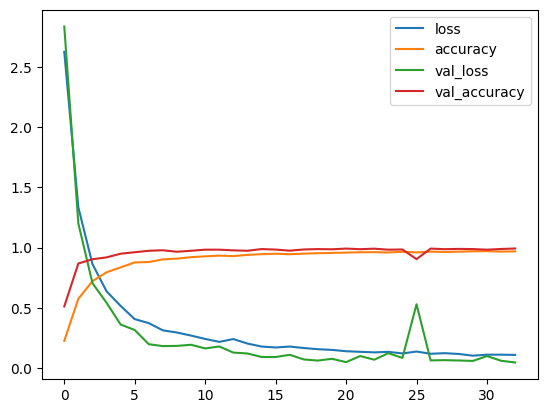

In [ ]:
Grap_Data = pd.DataFrame(CNN_Model.history)
Grap_Data.plot()

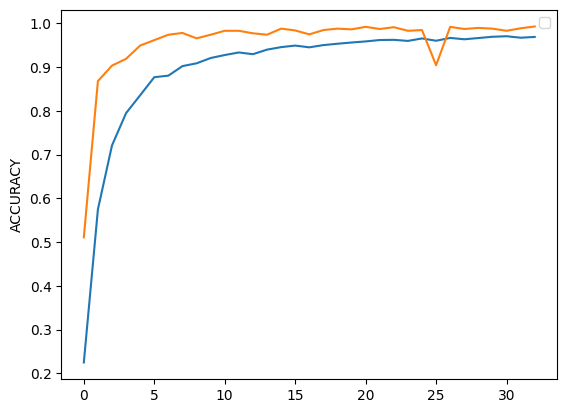

In [ ]:
plt.plot(CNN_Model.history["accuracy"])
plt.plot(CNN_Model.history["val_accuracy"])
plt.ylabel("ACCURACY")
plt.legend()
plt.show()

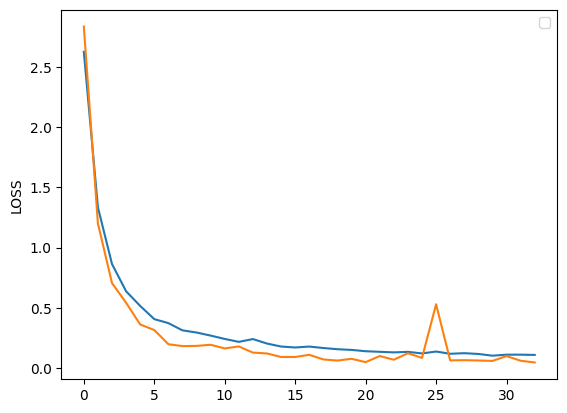

In [ ]:
plt.plot(CNN_Model.history["loss"])
plt.plot(CNN_Model.history["val_loss"])
plt.ylabel("LOSS")
plt.legend()
plt.show()

In [ ]:
Model_Results = Model.evaluate(Test_Set)
print("LOSS" + "%.4f" % Model_Results[0])
print("ACCURACY" + "%.4f" % Model_Results[1])


43/43 [==============================] - 5s 122ms/step - loss: 0.0287 - accuracy: 0.9889
LOSS0.0287
ACCURACY0.9889


In [ ]:
Model_Test_Prediction = Model.predict(Test_Set)
Model_Test_Prediction = Model_Test_Prediction.argmax(axis= -1)

43/43 [==============================] - 5s 117ms/step


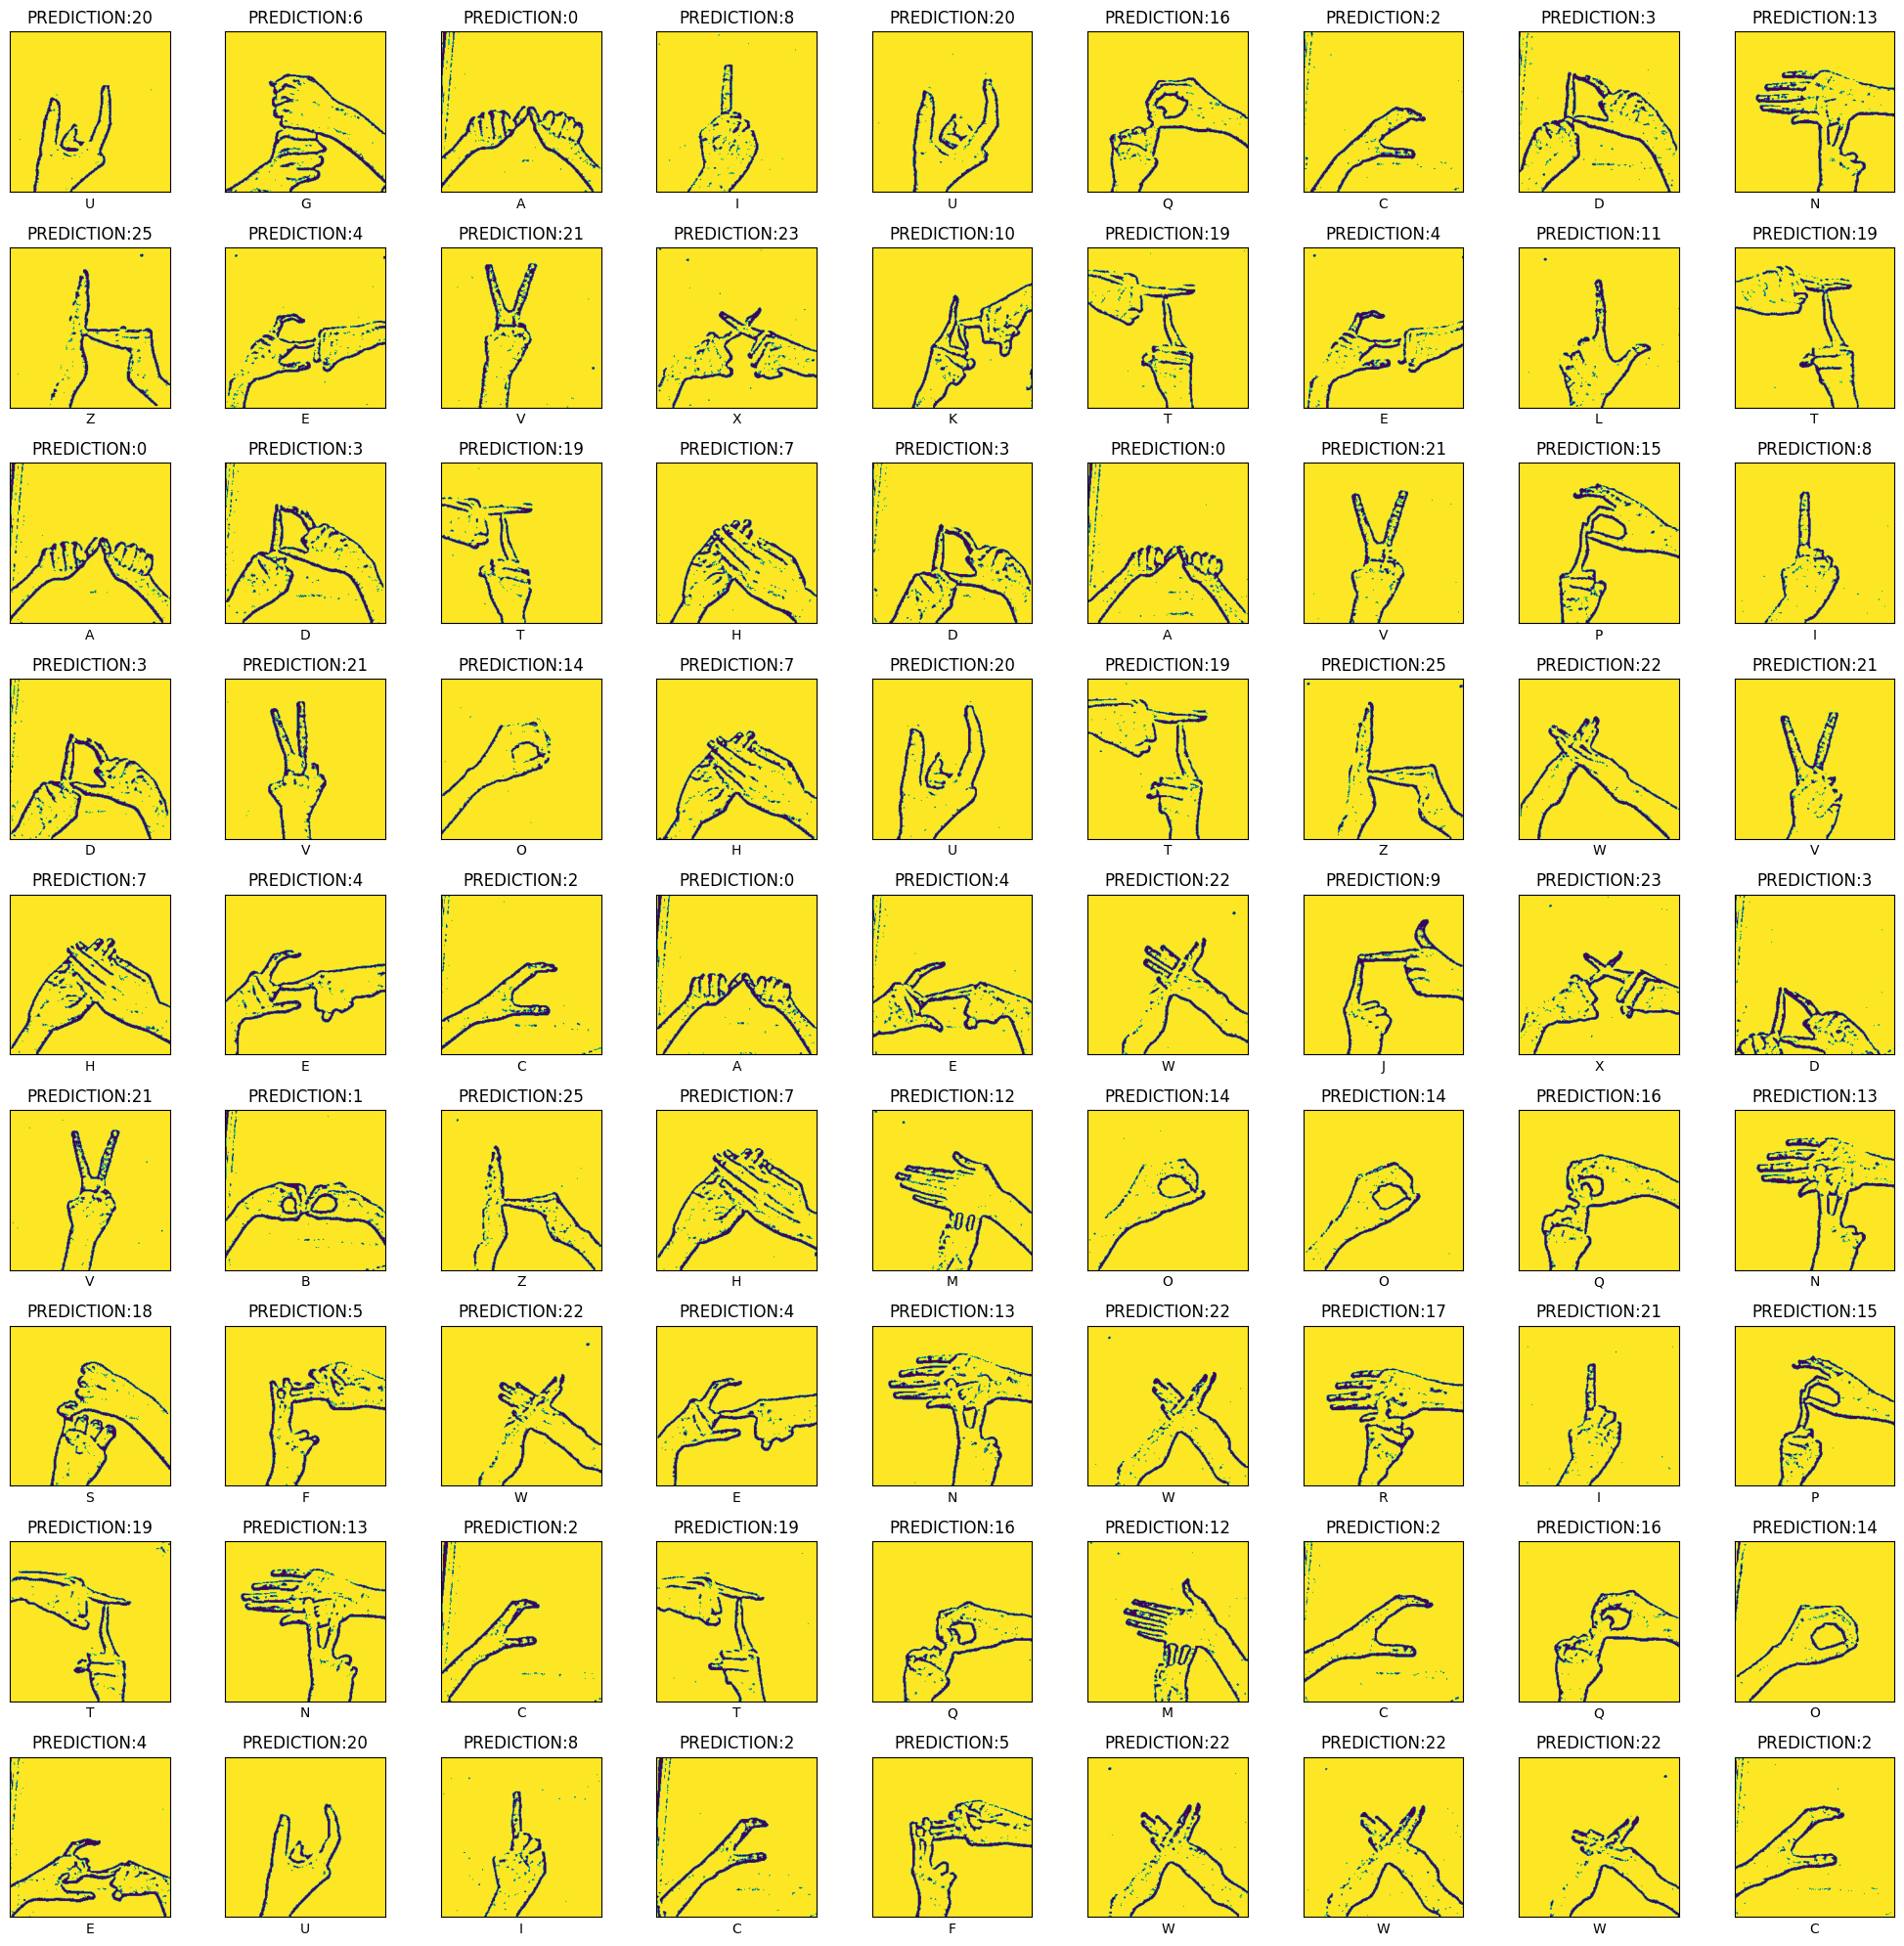

In [ ]:
fig, axes = plt.subplots(nrows=9,
                         ncols=9,
                         figsize=(20, 20),
                        subplot_kw={'xticks': [], 'yticks': []})

for i, ax in enumerate(axes.flat):
    ax.imshow(plt.imread(X_Test["image_path"].iloc[i]))
    ax.set_title(f"PREDICTION:{Model_Test_Prediction[i]}")
    ax.set_xlabel(X_Test["label"].iloc[i])
plt.tight_layout()
plt.show()

In [ ]:
import pickle

In [ ]:
with open('mode_pkl', 'wb') as files:
  pickle.dump(Model, files)